<a href="https://colab.research.google.com/github/RohanJaiswall/Assignment/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download data
!git clone https://github.com/RohanJaiswall/TRTC1



Cloning into 'TRTC1'...
remote: Enumerating objects: 16470, done.
remote: Total 16470 (delta 0), reused 0 (delta 0), pack-reused 16470
Receiving objects: 100% (16470/16470), 215.48 MiB | 19.65 MiB/s, done.
Updating files: 100% (16467/16467), done.


# New Section

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow import keras
import tensorflow as tf
from keras.models import  Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [3]:
datadir = 'TRTC1'
columns = ['center'  ,  'left'  ,  'right'   ,   'steering'  ,   'throttle'  ,   'reverse' ,  'speed' ]
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\center_2024_06_19_12_58_48_843.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\left_2024_06_19_12_58_48_843.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\right_2024_06_19_12_58_48_843.jpg,0.0,0.0,0.0,0.000078
1,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\center_2024_06_19_12_58_48_946.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\left_2024_06_19_12_58_48_946.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\right_2024_06_19_12_58_48_946.jpg,0.0,0.0,0.0,0.000078
2,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\center_2024_06_19_12_58_49_054.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\left_2024_06_19_12_58_49_054.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\right_2024_06_19_12_58_49_054.jpg,0.0,0.0,0.0,0.000080
3,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\center_2024_06_19_12_58_49_155.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\left_2024_06_19_12_58_49_155.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\right_2024_06_19_12_58_49_155.jpg,0.0,0.0,0.0,0.000083
4,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\center_2024_06_19_12_58_49_266.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\left_2024_06_19_12_58_49_266.jpg,C:\Users\rohan\OneDrive\Desktop\TRTC 2024\IMG\right_2024_06_19_12_58_49_266.jpg,0.0,0.0,0.0,0.000078


In [4]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2024_06_19_12_58_48_843.jpg,left_2024_06_19_12_58_48_843.jpg,right_2024_06_19_12_58_48_843.jpg,0.0,0.0,0.0,0.000078
1,center_2024_06_19_12_58_48_946.jpg,left_2024_06_19_12_58_48_946.jpg,right_2024_06_19_12_58_48_946.jpg,0.0,0.0,0.0,0.000078
2,center_2024_06_19_12_58_49_054.jpg,left_2024_06_19_12_58_49_054.jpg,right_2024_06_19_12_58_49_054.jpg,0.0,0.0,0.0,0.000080
3,center_2024_06_19_12_58_49_155.jpg,left_2024_06_19_12_58_49_155.jpg,right_2024_06_19_12_58_49_155.jpg,0.0,0.0,0.0,0.000083
4,center_2024_06_19_12_58_49_266.jpg,left_2024_06_19_12_58_49_266.jpg,right_2024_06_19_12_58_49_266.jpg,0.0,0.0,0.0,0.000078


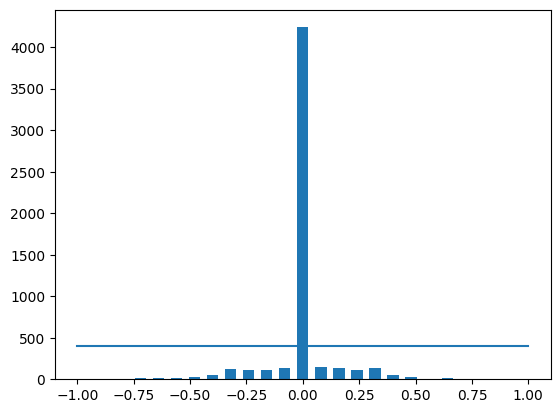

In [5]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [6]:
print('total data:', len(data))
print(data.shape)

total data: 5488
(5488, 7)


In [7]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 3839
remaining: 1649


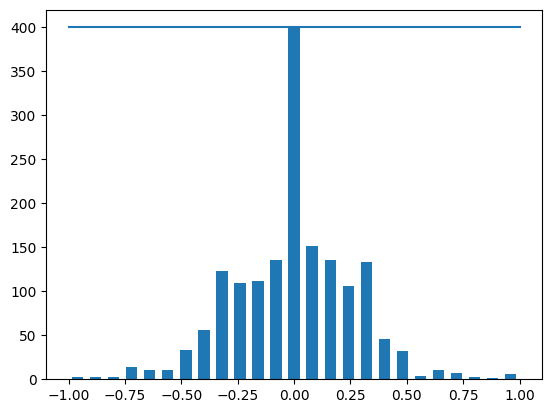

In [8]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [9]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [10]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [11]:
len(image_paths)


4947

In [12]:
len(steerings)

4947

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))



Training Samples: 3957
Valid Samples: 990


Text(0.5, 1.0, 'Validation set')

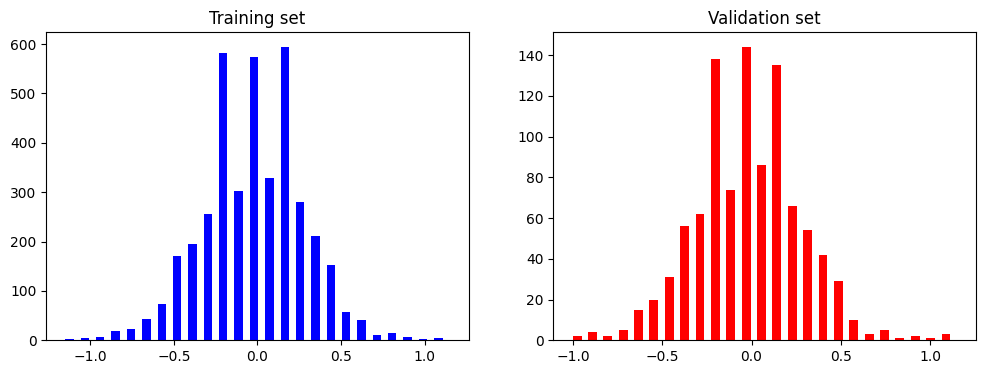

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [19]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')




NameError: name 'mpimg' is not defined